# ANALISIS DE INFORMACION DEL DENUE 2019 vs 2020
## Directorio Estadístico Nacional de Unidades Económicas
![Procesamiento de Datos con Python](images/imagen.png "Procesamiento de Datos con Python")
## Alcances
* Conocer los datos de la CATEGORIA "FARMACIAS" 
Código|Título
:----:|:------
464111|Farmacias sin minisúper
464112|Farmacias con minisúper
464113|Comercio al por menor de productos naturistas, <br>medicamentos homeopáticos y de complementos alimenticios
<br>

* Actividades económicas pertenecientes al "COMERCIO AL POR MENOR" en los períodos:
    - 11/2020, 
    - 04/2020, 
    - 11/2019, y 
    - 04/2019.


## 1. Introducción.
DENUE Contiene información en línea de millones de establecimientos en México. Con la pandemia del COVID-19, es importante identificar que unidades de negocio se vieron afectados o florecieron sobre la misma.

## 2. Procedimiento Extracción, Transformación y Carga

### 2.1. Importación de paquetes

In [6]:
# Import from basic libraries

import os
import io
import zipfile

# Import from third party libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws

ws.filterwarnings('ignore')

import requests

### 2.2. Configuración de Pandas.

In [7]:
# No muestre columnas maximas 
pd.set_option('display.max_columns', None)

### 2.3. Creacción de carpetas de trabajo, donde se descargaran los archivos de trabajo de DENUE.

In [139]:
print('---------------------------------------------------------------')
print('Creacción carpeta de almacenamiento temporal y principal de datos')
container_folder =  'data/'
print(os.path.exists(container_folder))
if not (os.path.exists(container_folder)):
    print('--------------------------------')
    print('MSG: Dataset container folder does not exists')
    os.makedirs(container_folder)
    print(f'MSG: Dataset container folder is created with name: {container_folder}')
    print('--------------------------------')
print(os.path.realpath(container_folder))

print('---------------------------------------------------------------')
print('Creacción carpeta ´de almacenamiento de archivos a descomprimir')
mode = 0o777
unzipped_folder = 'data/unzippedDD'
print(os.path.exists(unzipped_folder))
if not (os.path.exists(unzipped_folder)):
    print('--------------------------------')
    print('MSG: Dataset unzipped folder does not exists')
    os.makedirs(unzipped_folder, mode)
    print(f'MSG: Dataset unzipped folder is created with name: {unzipped_folder}')
    print('--------------------------------')
print(os.path.realpath(unzipped_folder))

print('---------------------------------------------------------------')
print('Creacción carpeta de configuración (Persistencia de Listas)')
config_folder = 'data/config'
print(os.path.exists(config_folder))
if not (os.path.exists(config_folder)):
    print('--------------------------------')
    print('MSG: Dataset config folder does not exists')
    os.makedirs(config_folder, mode)
    print(f'MSG: Dataset config folder is created with name: {config_folder}')
    print('--------------------------------')
print(os.path.realpath(config_folder))
print('---------------------------------------------------------------')
cp_folder = 'cp/'
print(f'Ruta a leer códigos postales: {cp_folder}')
print(os.path.realpath(cp_folder))
print('---------------------------------------------------------------')


---------------------------------------------------------------
Creacción carpeta de almacenamiento temporal y principal de datos
True
C:\fabiola\bedu\Curso3-Procesamiento de datos con Python\proyectos\denue_info\data
---------------------------------------------------------------
Creacción carpeta ´de almacenamiento de archivos a descomprimir
True
C:\fabiola\bedu\Curso3-Procesamiento de datos con Python\proyectos\denue_info\data\unzippedDD
---------------------------------------------------------------
Creacción carpeta de configuración (Persistencia de Listas)
True
C:\fabiola\bedu\Curso3-Procesamiento de datos con Python\proyectos\denue_info\data\config
---------------------------------------------------------------
Ruta a leer códigos postales: cp/
C:\fabiola\bedu\Curso3-Procesamiento de datos con Python\proyectos\denue_info\cp
---------------------------------------------------------------


### 2.4. Descarga de archivos ZIP desde el sitio de INEGI y extracción de archivos CVS en ambiente local.
Los archivos CVS corresponden a la actividad económica "COMERCIO AL POR MENOR" en los períodos:
- 11/2020, 
- 04/2020, 
- 11/2019, y 
- 04/2019.


* CONSIDERACIONES:
    * Los archivos CVS se descargan comprimidos.
    * Cada período tiene su liga correspondiente, es decir, son cuatro url's a definir.
    * La información de la actividad económica "COMERCIO AL POR MENOR" contiene gran volumen por lo que está fragmentado en 4 archivos.

#### Configuración de variables a utilizar en los procesos:
* Descarga de archivos ZIP y 
* Descomprensión de archivos con información a utilizar.

In [9]:
# Definición de de URLs base
URL_BASE = 'https://www.inegi.org.mx/contenidos/masiva/denue/'
# URL_BASE_PERIODO_2020_04 = 'https://www.inegi.org.mx/contenidos/masiva/denue/2020_04/'
# Definición de períodos a
PERIODOS = ['2020_11', '2020_04', '2019_11', '2019_04']

# Definición de archivos DENUE
# PERIODO 11_2020
FILES_DENUE = {1:'denue_00_46111_csv',
2:'denue_00_46112-46311_csv',
3:'denue_00_46321-46531_csv',
4:'denue_00_46591-46911_csv',
# PERIODO_04_2020
5:'denue_00_46111_0420_csv',
6:'denue_00_46112-46311_0420_csv',
7:'denue_00_46321-46531_0420_csv',
8:'denue_00_46591-46911_0420_csv',
# PERIODO_11_2019
9:'denue_00_46111_1119_csv',
10:'denue_00_46112-46311_1119_csv',
11:'denue_00_46321-46531_1119_csv',
12:'denue_00_46591-46911_1119_csv',
# PERIODO_04_2019
13:'denue_00_46111_0419_csv',
14:'denue_00_46112-46311_0419_csv',
15:'denue_00_46321-46531_0419_csv',
16:'denue_00_46591-46911_0419_csv'}
print(len(FILES_DENUE))

16


#### Descarga de archivos ZIP en carpeta '.\data\'

In [16]:
# print ("Identificador del diccionario : {}\n".format(id(FILES_DENUE)))
# for k, v in FILES_DENUE.items():
#    print ("{} --> {}".format(k,v))

zips_file = []

for key in FILES_DENUE:
    URL_ONLINE_DATASET = URL_BASE 

    if key in {1,2,3,4}:
        filename = PERIODOS[0] + '_' + FILES_DENUE[key] + '.zip'
    if key in {5,6,7,8}:
        URL_ONLINE_DATASET += (PERIODOS[1] + '/' )
        filename = PERIODOS[1]  + '_' + FILES_DENUE[key] + '.zip'
    if key in {9,10,11,12}:
        URL_ONLINE_DATASET += (PERIODOS[2] + '/' )
        filename = PERIODOS[2]  + '_' + FILES_DENUE[key] + '.zip'
    if key in {13,14,15,16}:
        URL_ONLINE_DATASET += (PERIODOS[3] + '/' )
        filename = PERIODOS[3]  + '_' + FILES_DENUE[key] + '.zip'

    zips_file.append(filename)
    URL_ONLINE_DATASET +=  FILES_DENUE[key] 
    URL_ONLINE_DATASET_zip = ( URL_ONLINE_DATASET + '.zip' )
        
    #print(URL_ONLINE_DATASET)
    print(f'Get {URL_ONLINE_DATASET_zip}')
    # print(filename)
    
    print(f'Download File Number: {key} of {len(FILES_DENUE)}. Wait please...')
    response = requests.get(URL_ONLINE_DATASET_zip)
    print(f'Estatus: {response.status_code}')
    response.raise_for_status()
    with open( container_folder + filename, 'wb') as zip_file:
        zip_file.write(response.content)
    print(f'File downloaded Number: {key} of {len(FILES_DENUE)}')
    print('------------------------------------------------------------------')

print(zips_file)

Get https://www.inegi.org.mx/contenidos/masiva/denue/denue_00_46111_csv.zip
Download File Number: 1 of 16. Wait please...
200
File downloaded Number: 1 of 16
------------------------------------------------------------------
Get https://www.inegi.org.mx/contenidos/masiva/denue/denue_00_46112-46311_csv.zip
Download File Number: 2 of 16. Wait please...
200
File downloaded Number: 2 of 16
------------------------------------------------------------------
Get https://www.inegi.org.mx/contenidos/masiva/denue/denue_00_46321-46531_csv.zip
Download File Number: 3 of 16. Wait please...
200
File downloaded Number: 3 of 16
------------------------------------------------------------------
Get https://www.inegi.org.mx/contenidos/masiva/denue/denue_00_46591-46911_csv.zip
Download File Number: 4 of 16. Wait please...
200
File downloaded Number: 4 of 16
------------------------------------------------------------------
Get https://www.inegi.org.mx/contenidos/masiva/denue/2020_04/denue_00_46111_0420_c

#### Extracción de archivos en carpeta '.\data\unzippedDD'

In [109]:
# print(zips_file)
ruta = os.path.realpath(container_folder) + '\\' 

carpeta = 'conjunto_de_datos'
cvs = '.csv'

print('..............................................................................')
list_files_with_path = []
list_only_files = []
for element in range(len(zips_file)):
    path_file_zip = ''
    archivoCVS = ''
    zf = zipfile.ZipFile(ruta + zips_file[element], 'r')
    prefijo = zips_file[element] 
    prefijo = prefijo[0:8]
    for info in zf.infolist():
        name = info.filename        
        if name.find(carpeta) >= 0:
            if name.find(cvs)  >= 0:
                print(info.filename)
                str_split = name.split('/')
                archivoCVS = str_split[len(str_split)-1]
                path_file_zip = info.filename
    
    unzipped = zipfile.ZipFile(ruta + zips_file[element])
    target_name = os.path.realpath(unzipped_folder) + '\\' + prefijo + archivoCVS
    list_files_with_path.append(target_name)
    list_only_files.append(prefijo + archivoCVS)
    with open(target_name, "wb") as f:  # open the output path for writing
        f.write(unzipped.read(path_file_zip))  # save the contents of the file in path_file_zip
    unzipped.close()
    print(f'File extracted Number: {element+1} of {len(zips_file)}')
    print('..............................................................................')

print('Successfull Extraction!!!')

..............................................................................
conjunto_de_datos/denue_inegi_46111_.csv
File extracted Number: 1 of 16
..............................................................................
conjunto_de_datos/denue_inegi_46112-46311_.csv
File extracted Number: 2 of 16
..............................................................................
conjunto_de_datos/denue_inegi_46321-46531_.csv
File extracted Number: 3 of 16
..............................................................................
conjunto_de_datos/denue_inegi_46591-46911_.csv
File extracted Number: 4 of 16
..............................................................................
conjunto_de_datos/denue_inegi_46111_.csv
File extracted Number: 5 of 16
..............................................................................
conjunto_de_datos/denue_inegi_46112-46311_.csv
File extracted Number: 6 of 16
......................................................................

#### Persistencia de listas que se utilizaran en los siguientes procesos.
--------------------------------------------------------------------


In [78]:
config_folder
list_files_with_path
print('Persistiendo en DD, la lista <<list_files_with_path>>')
path = config_folder + '/' + 'list_files_with_path.txt'
print(f'mi_path: {path}')
with open(path, 'a+') as f:
    f.writelines("%s\n" % s for s in list_files_with_path)

    #for i in list_files_with_path:
    #    f.writelines(i) 

Persistiendo en DD, la lista <<list_only_files>>
mi_path: data/config/list_files_with_path.txt


In [81]:
config_folder
list_only_files
print('Persistiendo en DD, la lista <<list_only_files>>')
path = config_folder + '/' + 'list_only_files.txt'
# print(f'path: {path}')
with open(path, 'a+') as f:
    f.writelines("%s\n" % s for s in list_only_files)

Persistiendo en DD, la lista <<list_only_files>>


#### Lectura de listas almacenadas en archivos, que se utilizaran en los siguientes procesos.
--------------------------------------------------------------------

In [165]:
list_files_with_path = []
path = config_folder + '/' + 'list_files_with_path.txt'
# print(f'mi_path: {mi_path}')
i = 1
with open(path, 'r') as f:
    list_files_with_path = f.readlines()

stripped = [s.strip() for s in list_files_with_path]
list_files_with_path = stripped

print(list_files_with_path)

print(len(list_files_with_path))


['C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46111_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46112-46311_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46321-46531_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46591-46911_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46111_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46112-46311_.csv', 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46321-46531_.csv', 'C:\\fabiola\\bed

In [166]:
list_only_files = []
path = config_folder + '/' + 'list_only_files.txt'
print(f'path: {path}')

with open(path, 'r') as f:
    list_only_files = f.readlines()
 
stripped = [s.strip() for s in list_only_files]
list_only_files = stripped
print(list_only_files)
print(len(list_only_files))

path: data/config/list_only_files.txt
['2020_11_denue_inegi_46111_.csv', '2020_11_denue_inegi_46112-46311_.csv', '2020_11_denue_inegi_46321-46531_.csv', '2020_11_denue_inegi_46591-46911_.csv', '2020_04_denue_inegi_46111_.csv', '2020_04_denue_inegi_46112-46311_.csv', '2020_04_denue_inegi_46321-46531_.csv', '2020_04_denue_inegi_46591-46911_.csv', '2019_11_denue_inegi_46111_.csv', '2019_11_denue_inegi_46112-46311_.csv', '2019_11_denue_inegi_46321-46531_.csv', '2019_11_denue_inegi_46591-46911_.csv', '2019_04_denue_inegi_46111_.csv', '2019_04_denue_inegi_46112-46311_.csv', '2019_04_denue_inegi_46321-46531_.csv', '2019_04_denue_inegi_46591-46911_.csv']
16


In [95]:
list_files_with_path

['C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46591-46911_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46321-46531_.csv',
 'C:\\fabio

In [94]:
list_only_files

['2020_11_denue_inegi_46111_.csv',
 '2020_11_denue_inegi_46112-46311_.csv',
 '2020_11_denue_inegi_46321-46531_.csv',
 '2020_11_denue_inegi_46591-46911_.csv',
 '2020_04_denue_inegi_46111_.csv',
 '2020_04_denue_inegi_46112-46311_.csv',
 '2020_04_denue_inegi_46321-46531_.csv',
 '2020_04_denue_inegi_46591-46911_.csv',
 '2019_11_denue_inegi_46111_.csv',
 '2019_11_denue_inegi_46112-46311_.csv',
 '2019_11_denue_inegi_46321-46531_.csv',
 '2019_11_denue_inegi_46591-46911_.csv',
 '2019_04_denue_inegi_46111_.csv',
 '2019_04_denue_inegi_46112-46311_.csv',
 '2019_04_denue_inegi_46321-46531_.csv',
 '2019_04_denue_inegi_46591-46911_.csv']

In [164]:
list_files_with_path = ['C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46591-46911_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46591-46911_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_11_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_11_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_11_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_11_denue_inegi_46591-46911_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_04_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_04_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_04_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2019_04_denue_inegi_46591-46911_.csv']

list_files_with_path

['C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46321-46531_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_11_denue_inegi_46591-46911_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46111_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46112-46311_.csv',
 'C:\\fabiola\\bedu\\Curso3-Procesamiento de datos con Python\\proyectos\\denue_info\\data\\unzippedDD\\2020_04_denue_inegi_46321-46531_.csv',
 'C:\\fabio

In [80]:
list_only_files = ['2020_11_denue_inegi_46111_.csv',
 '2020_11_denue_inegi_46112-46311_.csv',
 '2020_11_denue_inegi_46321-46531_.csv',
 '2020_11_denue_inegi_46591-46911_.csv',
 '2020_04_denue_inegi_46111_.csv',
 '2020_04_denue_inegi_46112-46311_.csv',
 '2020_04_denue_inegi_46321-46531_.csv',
 '2020_04_denue_inegi_46591-46911_.csv',
 '2019_11_denue_inegi_46111_.csv',
 '2019_11_denue_inegi_46112-46311_.csv',
 '2019_11_denue_inegi_46321-46531_.csv',
 '2019_11_denue_inegi_46591-46911_.csv',
 '2019_04_denue_inegi_46111_.csv',
 '2019_04_denue_inegi_46112-46311_.csv',
 '2019_04_denue_inegi_46321-46531_.csv',
 '2019_04_denue_inegi_46591-46911_.csv']

list_only_files

['2020_11_denue_inegi_46111_.csv',
 '2020_11_denue_inegi_46112-46311_.csv',
 '2020_11_denue_inegi_46321-46531_.csv',
 '2020_11_denue_inegi_46591-46911_.csv',
 '2020_04_denue_inegi_46111_.csv',
 '2020_04_denue_inegi_46112-46311_.csv',
 '2020_04_denue_inegi_46321-46531_.csv',
 '2020_04_denue_inegi_46591-46911_.csv',
 '2019_11_denue_inegi_46111_.csv',
 '2019_11_denue_inegi_46112-46311_.csv',
 '2019_11_denue_inegi_46321-46531_.csv',
 '2019_11_denue_inegi_46591-46911_.csv',
 '2019_04_denue_inegi_46111_.csv',
 '2019_04_denue_inegi_46112-46311_.csv',
 '2019_04_denue_inegi_46321-46531_.csv',
 '2019_04_denue_inegi_46591-46911_.csv']

### 2.5. Reading datasets from folder/file
#### 2.5.1. Consolidación de archivos CVS 
Se consolidaran los archivos CVS pertenecientes a:

Código|Título
:----:|:------
464111|Farmacias sin minisúper
464112|Farmacias con minisúper
464113|Comercio al por menor de productos naturistas, <br>medicamentos homeopáticos y de complementos alimenticios


In [189]:
nu_rows = 0
tt_nat = 'denue_inegi_46321-46531_.csv'
t_naturista = { 4 : '2020_11_denue_inegi_46321-46531_.csv', 
                7 : '2020_04_denue_inegi_46321-46531_.csv', 
               11 : '2019_11_denue_inegi_46321-46531_.csv', 
               15 : '2019_04_denue_inegi_46321-46531_.csv' }
# ramo_naturismo = [4, 7, 11, 15]

print('Upload in DataFrame...')
print('Wait, please...')
frames = []

for element in range(len(list_only_files)):
    if (element+1) in {4, 7, 11, 15}:
        print('***********************************************************************************')    
        print(f'Reading file CVS: {list_only_files[element]}. Wait, please...')
        # df = pd.read_csv(list_files_with_path[element], encoding='utf-8')
        df = pd.read_csv(list_files_with_path[element])
        periodo = list_only_files[element][0:7]
        #print(periodo)
        # df['periodo'] = periodo

        df.insert(0, 'periodo', periodo)
        frames.append(df)

        total_rows = len(df)
        nu_rows += total_rows
        print(f'Número de renglones para {list_only_files[element]}: {nu_rows}')
        print(f'Numero de renglones acumulado: {nu_rows}')
        print('***********************************************************************************')

result = pd.concat(frames)
result.shape


Upload in DataFrame...
Wait, please...
***********************************************************************************
Reading file CVS: 2020_11_denue_inegi_46591-46911_.csv. Wait, please...
Número de renglones para 2020_11_denue_inegi_46591-46911_.csv: 512387
Numero de renglones acumulado: 512387
***********************************************************************************
***********************************************************************************
Reading file CVS: 2020_04_denue_inegi_46321-46531_.csv. Wait, please...
Número de renglones para 2020_04_denue_inegi_46321-46531_.csv: 1077113
Numero de renglones acumulado: 1077113
***********************************************************************************
***********************************************************************************
Reading file CVS: 2019_11_denue_inegi_46321-46531_.csv. Wait, please...
Número de renglones para 2019_11_denue_inegi_46321-46531_.csv: 1641582
Numero de renglones acumulado: 16415

(2172950, 42)

#### 2.5.2. Knowing dataset


#### Conociendo el dataset (consolidado):
- Identificando tamaño de la información


In [190]:
# Identificando el tamaño del dataset
result.shape

(2172950, 42)

In [191]:
# Identificando tipos de datos
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2172950 entries, 0 to 531367
Data columns (total 42 columns):
 #   Column      Dtype  
---  ------      -----  
 0   periodo     object 
 1   id          int64  
 2   nom_estab   object 
 3   raz_social  object 
 4   codigo_act  int64  
 5   nombre_act  object 
 6   per_ocu     object 
 7   tipo_vial   object 
 8   nom_vial    object 
 9   tipo_v_e_1  object 
 10  nom_v_e_1   object 
 11  tipo_v_e_2  object 
 12  nom_v_e_2   object 
 13  tipo_v_e_3  object 
 14  nom_v_e_3   object 
 15  numero_ext  object 
 16  letra_ext   object 
 17  edificio    object 
 18  edificio_e  object 
 19  numero_int  object 
 20  letra_int   object 
 21  tipo_asent  object 
 22  nomb_asent  object 
 23  tipoCenCom  object 
 24  nom_CenCom  object 
 25  num_local   object 
 26  cod_postal  float64
 27  cve_ent     int64  
 28  entidad     object 
 29  cve_mun     int64  
 30  municipio   object 
 31  cve_loc     int64  
 32  localidad   object 
 33  ageb    

In [192]:
# View some basic statistical details
result.describe()

,id,codigo_act,cod_postal,cve_ent,cve_mun,cve_loc,manzana,latitud,longitud
count,2.172950e+06,2.172950e+06,2.167169e+06,2.172950e+06,2.172950e+06,2.172950e+06,2.172940e+06,2.172950e+06,2.172950e+06
mean,4.463651e+06,4.647721e+05,5.302597e+04,1.601113e+01,5.116476e+01,1.171616e+01,1.400527e+03,2.074989e+01,-1.000439e+02
std,2.964731e+06,1.449056e+03,2.536027e+04,7.488234e+00,6.226938e+01,1.003388e+02,2.035155e+06,3.269651e+00,4.520328e+00
min,4.000000e+00,4.632110e+05,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-1.244455e+02
25%,1.847622e+06,4.632150e+05,3.647000e+04,1.100000e+01,1.300000e+01,1.000000e+00,7.000000e+00,1.925422e+01,-1.017081e+02
50%,3.718136e+06,4.651110e+05,5.443500e+04,1.500000e+01,3.300000e+01,1.000000e+00,1.600000e+01,1.964558e+01,-9.923075e+01
75%,7.493250e+06,4.653110e+05,7.298000e+04,2.100000e+01,7.000000e+01,1.000000e+00,2.600000e+01,2.109251e+01,-9.837874e+01
max,9.332128e+06,4.691100e+05,9.999900e+04,3.200000e+01,5.700000e+02,9.005000e+03,3.000000e+09,3.271806e+01,0.000000e+00


In [194]:
# Conociendo los datos
result.head(5)

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,tipo_v_e_2,nom_v_e_2,tipo_v_e_3,nom_v_e_3,numero_ext,letra_ext,edificio,edificio_e,numero_int,letra_int,tipo_asent,nomb_asent,tipoCenCom,nom_CenCom,num_local,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,2020_11,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,CC. VILLASUNCION,CALLE,VALENTE QUINTANA,CALLE,ABRAHAM GONZ�LEZ,BOULEVARD,JOSE MARIA CHAVEZ,0.0,SN,NaN,NaN,NaN,NaN,HACIENDA,INFONAVIT PILAR BLANCO,NaN,NaN,NaN,20289.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,27.0,NaN,NaN,WWW.ELEKTRA.COM.MX,Fijo,21.850052,-102.293881,2010-07
1,2020_11,6281352,1504 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,PRIVADA,ALLENDE,CALLE,5 DE MAYO,CALLE,BENITO JUAREZ,AVENIDA,FRANCISCO I MADERO,117.0,NaN,NaN,NaN,NaN,NaN,COLONIA,AGUASCALIENTES CENTRO,NaN,NaN,NaN,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0638,13.0,NaN,NaN,WWW.ELEKTRA.COM.MX,Fijo,21.882179,-102.296906,2010-07
2,2020_11,8853,2007 ALUMINIO,NaN,467114,Comercio al por menor de vidrios y espejos,0 a 5 personas,AVENIDA,MAHATMA GANDHI,CALLE,�NGEL GONZALEZ,AVENIDA,AGUASCALIENTES SUR,BOULEVARD,JOS� MAR�A CH�VEZ,104.0,NaN,NaN,NaN,NaN,NaN,FRACCIONAMIENTO,PARQUE URBANO HEROES MEXICANOS,NaN,NaN,NaN,20280.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,46.0,4499715111.0,NaN,NaN,Fijo,21.857334,-102.294679,2010-07
3,2020_11,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,MORELOS,AVENIDA,MOTOLIN�A PONIENTE,CALLE,HEROICO COLEGIO MILITAR PONIENTE,CALLE,LIBERTAD,413.0,NaN,NaN,NaN,NaN,NaN,COLONIA,RINCON DE ROMOS CENTRO,NaN,NaN,NaN,20400.0,1,AGUASCALIENTES,7,Rinc�n de Romos,1,Rinc�n de Romos,0059,31.0,NaN,NaN,WWW.ELEKTRA.COM.MX,Fijo,22.232272,-102.320699,2010-07
4,2020_11,6281175,3010 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,AVENIDA,Convenci�n de 1914 Poniente,AVENIDA,Fundici�n,AVENIDA,Pedro Garc�a Rojas,CALLE,Benjam�n de la Mora,0.0,SN,NaN,NaN,0.0,NaN,HACIENDA,OLIVARES SANTANA,NaN,NaN,NaN,20010.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0322,31.0,NaN,NaN,WWW.ELEKTRA.COM.MX,Fijo,21.894886,-102.311428,2010-07


In [193]:
result.tail(5)

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,tipo_v_e_2,nom_v_e_2,tipo_v_e_3,nom_v_e_3,numero_ext,letra_ext,edificio,edificio_e,numero_int,letra_int,tipo_asent,nomb_asent,tipoCenCom,nom_CenCom,num_local,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
531363,2019_04,4628139,ZONA VIP MODA,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,HER�ICO COLEGIO MILITAR,ANDADOR,NINGUNO,CALLE,LUIS MOYA,CALLEJ�N,DEL CODO,NaN,SN,NaN,NaN,NaN,NaN,SECCI�N,SECCI�N 2,NaN,NaN,NaN,99400.0,32,ZACATECAS,31,Monte Escobedo,1,Monte Escobedo,0242,26.0,NaN,NaN,NaN,Fijo,22.302581,-103.560015,2014-12
531364,2019_04,4596737,ZOY ZOLO YO,DISE�O Y MODA PARISINA,463211,"Comercio al por menor de ropa, excepto de beb�...",6 a 10 personas,AVENIDA,HIDALGO,AVENIDA,DE ROSALES,CALLEJ�N,DE SAN AGUST�N,AVENIDA,HIDALGO,153.0,NaN,NaN,NaN,NaN,NaN,COLONIA,CENTRO,NaN,NaN,NaN,98000.0,32,ZACATECAS,56,Zacatecas,1,Zacatecas,0082,28.0,NaN,NaN,NaN,Fijo,22.774055,-102.573776,2010-07
531365,2019_04,4615024,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CALLE,INDEPENDENCIA,CALLE,ALDAMA,CALLE,GARC�A DE LA CADENA,CALLE,ARROYO DE LA PLATA,98.0,NaN,NaN,NaN,NaN,NaN,COLONIA,CENTRO,NaN,NaN,NaN,98600.0,32,ZACATECAS,56,Zacatecas,1,Zacatecas,0114,20.0,9226563,AFLORES@IMAX-PRO.COM.MX,NaN,Fijo,22.771058,-102.573292,2013-07
531366,2019_04,6723809,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,AVENIDA,JU�REZ,CALLE,ENSAYE,AVENIDA,MORELOS SUR,CALLE,AM�RICA,220.0,NaN,NaN,NaN,NaN,NaN,COLONIA,CENTRO,NaN,NaN,NaN,99000.0,32,ZACATECAS,10,Fresnillo,1,Fresnillo,0558,8.0,5558043700,AFLORES@IMAX-PRO.COM.MX,NaN,Fijo,23.174401,-102.870485,2016-01
531367,2019_04,4645665,ZULKA,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,VICENTE GUERRERO,CALLE,MONTEMORELOS,CALLE,ECHEVERR�A,CALLE,L�PEZ MATEOS,66.0,NaN,NaN,NaN,NaN,NaN,COLONIA,EJIDAL,NaN,NaN,NaN,98613.0,32,ZACATECAS,17,Guadalupe,1,Guadalupe,0690,1.0,NaN,NaN,NaN,Fijo,22.752712,-102.511851,2010-07


In [195]:
# Identificando columnas con valores nulos
result.isnull()

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,tipo_v_e_2,nom_v_e_2,tipo_v_e_3,nom_v_e_3,numero_ext,letra_ext,edificio,edificio_e,numero_int,letra_int,tipo_asent,nomb_asent,tipoCenCom,nom_CenCom,num_local,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531363,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
531364,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False
531365,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
531366,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


- Identificando cantidad de datos faltantes en el dataset


In [196]:

#  Contabilizar los valores perdidos en cada columna
missing_values_count = result.isnull().sum()
print(f'No. Total de Registros: {len(result)}')
print('----------------------------------------')
print('columna     | No. de Registros NULOS')
print('----------------------------------------')
# Visualizar cantidad de faltantes en cada columnas que conforman el dataset:
print(missing_values_count)
# missing_values_count

No. Total de Registros: 2172950
----------------------------------------
columna     | No. de Registros NULOS
----------------------------------------
periodo             0
id                  0
nom_estab           0
raz_social    1896431
codigo_act          0
nombre_act          0
per_ocu             0
tipo_vial        1839
nom_vial          263
tipo_v_e_1      30365
nom_v_e_1        9368
tipo_v_e_2      30512
nom_v_e_2        9582
tipo_v_e_3      25065
nom_v_e_3        8331
numero_ext     641430
letra_ext     1086526
edificio      1941646
edificio_e    1927768
numero_int    1492832
letra_int     2023281
tipo_asent       5929
nomb_asent        426
tipoCenCom    1872456
nom_CenCom    1852315
num_local     1865288
cod_postal       5781
cve_ent             0
entidad             0
cve_mun             0
municipio           0
cve_loc             0
localidad           0
ageb               10
manzana            10
telefono      1598955
correoelec    1943285
www           2062466
tipoUniEco   

- Identificando el PORCENTAJE de datos perdidos en el dataset


In [211]:

# ¿Qué % de valores perdidos hay sobre el total de valores?
#   Contamos el total de datos (celdas):
total_cells = np.product(result.shape)

# Contamos el total de valores perdidos, sumando todos los 
# valores de la variable que contiene los perdidos para cada columna:
total_missing = missing_values_count.sum()
# Calcular el PORCENTAJE:
porc_missing = total_missing/total_cells*100
print(f'El PORCENTAJE de valores perdidos es: {round(porc_missing,2)}')
print(f'De un Total de Registros: {len(result)}')

El PORCENTAJE de valores perdidos es: 24.47
De un Total de Registros: 2172950


- Identificando datos categóricos del dataframe
Descrip Columnas Categóricas | Nombre Columna 
:---------------------------|:------------------------------
Períodos | 'periodo'
Unidades económicas | 'codigo_act', 'nombre_act'
Número personal que ocupa | 'per_ocu'
Tipo de vialidad | 'tipo_vial'
Tipo de Asentamiento | 'tipo_asent'
Código Postal | 'cod_postal'
Clave Entidad | 'cve_ent'
Nombre de la Entidad | 'entidad'
Clave de Municipio | 'cve_mun'
Nombre del Municipio | 'municipio'
Clave de Localidad | 'cve_loc'
AGEB | 'ageb'
Tipo de Unidad Económica | 'tipoUniEco'


In [198]:
# Identificando períodos cargados
result.periodo.unique()

array(['2020_11', '2020_04', '2019_11', '2019_04'], dtype=object)

In [199]:
# Identificando unidades econonómicas
result.codigo_act.unique()

array([466112, 467114, 467117, 466114, 468111, 467115, 468211, 467111,
       466319, 466212, 468311, 465911, 465912, 467112, 466410, 468420,
       465913, 468212, 468412, 466211, 468411, 468112, 465919, 466312,
       466311, 468213, 466111, 467113, 465915, 469110, 466313, 465914,
       468419, 466314, 466113, 468413, 467116, 468414, 468319, 464121,
       463211, 465311, 465212, 463310, 465216, 465215, 464111, 463215,
       463216, 463212, 463213, 463217, 465213, 465111, 463214, 464113,
       465214, 464122, 465112, 465211, 463218, 465313, 465312, 464112],
      dtype=int64)

In [200]:
# Identificando valores de nombre_act
result.nombre_act.unique()

array(['Comercio al por menor de electrodom�sticos menores y aparatos de l�nea blanca',
       'Comercio al por menor de vidrios y espejos',
       'Comercio al por menor de art�culos para albercas y otros art�culos',
       'Comercio al por menor de cristaler�a, loza y utensilios de cocina',
       'Comercio al por menor de autom�viles y camionetas nuevos',
       'Comercio al por menor de art�culos para la limpieza',
       'Comercio al por menor de partes y refacciones nuevas para autom�viles, camionetas y camiones',
       'Comercio al por menor en ferreter�as y tlapaler�as',
       'Comercio al por menor de otros art�culos para la decoraci�n de interiores',
       'Comercio al por menor de tel�fonos y otros aparatos de comunicaci�n',
       'Comercio al por menor de motocicletas',
       'Comercio al por menor de mascotas',
       'Comercio al por menor de regalos',
       'Comercio al por menor de pisos y recubrimientos cer�micos',
       'Comercio al por menor de art�culos usado

In [201]:
result.per_ocu.unique()

array(['6 a 10 personas', '0 a 5 personas', '51 a 100 personas',
       '11 a 30 personas', '31 a 50 personas', '101 a 250 personas',
       '251 y m�s personas'], dtype=object)

In [202]:
result.tipo_asent.unique()

array(['HACIENDA', 'COLONIA', 'FRACCIONAMIENTO', 'EJIDO',
       'ZONA COMERCIAL', 'FRACCION', 'MANZANA', 'PARAJE', 'LOCALIDAD',
       'BARRIO', 'PARQUE INDUSTRIAL', 'CIUDAD INDUSTRIAL',
       'UNIDAD HABITACIONAL', 'OTRO (ESPECIFIQUE)', 'COTO', 'RINCONADA',
       'GRANJA', 'NINGUNO', 'RESIDENCIAL', nan, 'CONDOMINIO', 'SECCION',
       'SECTOR', 'EXHACIENDA', 'CIUDAD', 'CONJUNTO HABITACIONAL',
       'CORREDOR INDUSTRIAL', 'PUERTO', 'RANCHERIA', 'AEROPUERTO',
       'AMPLIACION', 'PUEBLO', 'SUPERMANZANA', 'UNIDAD', 'PRIVADA',
       'RANCHO', 'ZONA INDUSTRIAL', 'CUARTEL', 'VILLA', 'ZONA NAVAL',
       'PROLONGACION', 'CANTON', 'ZONA FEDERAL', 'INGENIO',
       'ZONA MILITAR', 'REGION', 'OTRO (ESPECIFICAR)', 'FRACCI�N',
       'AMPLIACI�N', 'CANT�N', 'SECCI�N', 'NINGUNO ', 'PROLONGACI�N',
       'RANCHER�A ', 'RANCHER�A', 'RINCONADA ', 'LOCALIDAD ', 'SECCI�N ',
       'REGI�N'], dtype=object)

In [186]:
result.tipo_vial.unique()

array(['AVENIDA', 'PRIVADA', 'CALLE', 'PEATONAL', 'PROLONGACION',
       'BOULEVARD', 'CALZADA', 'CIRCUITO', 'CARRETERA', 'ANDADOR',
       'PASAJE', 'AUTOPISTA', nan, 'CONTINUACION', 'OTRO (ESPECIFIQUE)',
       'RETORNO', 'CERRADA', 'AMPLIACION', 'CORREDOR', 'CALLEJON',
       'PERIFERICO', 'DIAGONAL', 'VIADUCTO', 'EJE VIAL', 'CIRCUNVALACION',
       'PROLONGACI�N', 'NINGUNO', 'CONTINUACI�N', 'TERRACER�A',
       'CALLEJ�N', 'AMPLIACI�N', 'PERIF�RICO', 'CAMINO', 'AVENIDA ',
       'OTRO (ESPECIFIQUE) ', 'CIRCUNVALACI�N', 'CARRETERA ', 'CALLE ',
       'BOULEVARD ', 'PLAZA', 'BRECHA'], dtype=object)

In [134]:
#Identificando valores de entidad
result.entidad.unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'COAHUILA DE ZARAGOZA', 'COLIMA', 'CHIAPAS',
       'CHIHUAHUA', 'CIUDAD DE M�XICO', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'M�XICO                      ',
       'MICHOAC�N DE OCAMPO       ', 'MORELOS', 'NAYARIT',
       'NUEVO LE�N   ', 'OAXACA', 'PUEBLA',
       'QUER�TARO                               ', 'QUINTANA ROO',
       'SAN LUIS POTOS�        ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ DE IGNACIO DE LA LLAVE',
       'YUCAT�N       ', 'ZACATECAS'], dtype=object)

In [131]:
# Identificando tipoUniEco
result.tipoUniEco.unique()

array(['Fijo', 'Semifijo'], dtype=object)

In [160]:
# Identificando valores de 'tipo_asent'
result.tipo_asent.unique()

array(['HACIENDA', 'COLONIA', 'FRACCIONAMIENTO', 'EJIDO',
       'ZONA COMERCIAL', 'FRACCION', 'MANZANA', 'PARAJE', 'LOCALIDAD',
       'BARRIO', 'PARQUE INDUSTRIAL', 'CIUDAD INDUSTRIAL',
       'UNIDAD HABITACIONAL', 'OTRO (ESPECIFIQUE)', 'COTO', 'RINCONADA',
       'GRANJA', 'NINGUNO', 'RESIDENCIAL', nan, 'CONDOMINIO', 'SECCION',
       'SECTOR', 'EXHACIENDA', 'CIUDAD', 'CONJUNTO HABITACIONAL',
       'CORREDOR INDUSTRIAL', 'PUERTO', 'RANCHERIA', 'AEROPUERTO',
       'AMPLIACION', 'PUEBLO', 'SUPERMANZANA', 'UNIDAD', 'PRIVADA',
       'RANCHO', 'ZONA INDUSTRIAL', 'CUARTEL', 'VILLA', 'ZONA NAVAL',
       'PROLONGACION', 'CANTON', 'ZONA FEDERAL', 'INGENIO',
       'ZONA MILITAR', 'REGION', 'OTRO (ESPECIFICAR)', 'FRACCI�N',
       'AMPLIACI�N', 'CANT�N', 'SECCI�N', 'NINGUNO ', 'PROLONGACI�N',
       'RANCHER�A ', 'RANCHER�A', 'RINCONADA ', 'LOCALIDAD ', 'SECCI�N ',
       'REGI�N'], dtype=object)

In [212]:
# Identificando las categorías de la columna 'cod_postal'
result.cod_postal.unique()

array([20289., 20000., 20280., ..., 99440., 98530., 98501.])

In [204]:
result.cve_ent.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32],
      dtype=int64)

In [205]:
result.entidad.unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'COAHUILA DE ZARAGOZA', 'COLIMA', 'CHIAPAS',
       'CHIHUAHUA', 'CIUDAD DE M�XICO', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'M�XICO                      ',
       'MICHOAC�N DE OCAMPO       ', 'MORELOS', 'NAYARIT',
       'NUEVO LE�N   ', 'OAXACA', 'PUEBLA',
       'QUER�TARO                               ', 'QUINTANA ROO',
       'SAN LUIS POTOS�        ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ DE IGNACIO DE LA LLAVE',
       'YUCAT�N       ', 'ZACATECAS'], dtype=object)

In [206]:
result.cve_mun.unique()

array([  1,   7,   3,   5,   6,   2,   4,  11,   9,   8,  10,  17,  30,
        35,  24,  18,  28,  27,  32,  33,  25,  20,  34,  38,  36,  22,
        19,  31,  23,  16,  21,  14,  12,  37,  29,  13,  15,  26,  97,
        40,  89, 101,  78,  59,  87,  68, 108,  69,  61,  51, 114,  74,
       109,  65,  96,  81, 106,  99, 102,  91,  46, 107,  44,  52,  94,
        86,  54,  80,  76,  57,  70,  60,  84,  77,  79,  73,  47,  55,
        48,  72,  75,  92, 110, 124,  49,  83, 113, 103,  41, 100,  64,
        67, 116,  50,  45,  71,  39, 123,  53, 115, 104, 112,  88,  62,
       122,  82, 111,  85,  66,  98,  43,  93,  58, 105, 117,  63,  90,
       121, 118,  56,  42, 120, 119, 125,  95, 515, 184, 397, 413, 475,
       482, 551, 324, 318, 390, 157, 378, 559, 166, 411, 472, 460, 312,
       250, 415, 200, 543, 386, 153, 467, 539, 364, 442, 385, 441, 334,
       350, 540, 190, 437, 565, 339, 242, 227, 469, 570, 337, 325, 409,
       278, 384, 516, 500, 295, 406, 177, 424, 273, 439, 550, 52

In [207]:
result.municipio.unique()

array(['Aguascalientes', 'Rinc�n de Romos', 'Calvillo', ...,
       'Santa Mar�a Texcatitl�n', 'Axutla', 'Mainero'], dtype=object)

In [208]:
result.cve_loc.unique()

array([   1,  458,  427, ...,  869, 3908, 1325], dtype=int64)

In [209]:
result.ageb.unique()

array(['1458', '0638', '0059', ..., '8476', '2892', '6670'], dtype=object)

In [210]:
result.tipoUniEco.unique()

array(['Fijo', 'Semifijo'], dtype=object)

##### 2.5.2.1 Conclusiones de esta primera revisión


<li>raz_social    1896431  * Medio impacto</li>
<li>tipo_vial        1839  * Bajo impacto</li>
<li>nom_vial          263  * Bajo impacto</li>
<li>tipo_v_e_1      30365  * Bajo impacto</li>
<li>nom_v_e_1        9368  * Bajo impacto</li>
<li>tipo_v_e_2      30512  * Bajo impacto</li>
<li>nom_v_e_2        9582  * Bajo impacto</li>
<li>tipo_v_e_3      25065  * Bajo impacto</li>
<li>nom_v_e_3        8331  * Bajo impacto</li>
<li>numero_ext     641430  * Bajo impacto</li>
<li>letra_ext     1086526  * Bajo impacto</li>
<li>edificio      1941646  * Bajo impacto</li>
<li>edificio_e    1927768  * Bajo impacto</li>
<li>numero_int    1492832  * Bajo impacto</li>
<li>letra_int     2023281  * Bajo impacto</li>
<li>tipo_asent       5929  * Alto impacto   -x-</li>
<li>nomb_asent        426  * Bajo impacto</li>
<li>tipoCenCom    1872456  * Bajo impacto</li>
<li>nom_CenCom    1852315  * Bajo impacto</li>
<li>num_local     1865288  * Bajo impacto</li>
<li>cod_postal       5781  * Alto impacto   -x- </li>

In [161]:
# Verificando si columna 'tipo_asent' contiene valores nulos
# Las siguientes columnas contienen valores nulos:
# tipo_asent,  
# cod_postal
# son importantes
result[pd.isnull(result.tipo_asent)]
result[pd.isnull(result.cod_postal)]

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,nom_v_e_1,tipo_v_e_2,nom_v_e_2,tipo_v_e_3,nom_v_e_3,numero_ext,letra_ext,edificio,edificio_e,numero_int,letra_int,tipo_asent,nomb_asent,tipoCenCom,nom_CenCom,num_local,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta
1429,2020_11,6422266,CVT AGUASCALIENTES,RADIOMOVIL DIPSA SA DE CV,466212,Comercio al por menor de tel�fonos y otros apa...,0 a 5 personas,NaN,CONVENCI�N DE 1914 ORIENTE,NaN,ANTONIO VIVALDI,NaN,BOROD�N,NaN,HER�ICO COLEGIO MILITAR,845.0,B,NaN,NaN,NaN,NaN,NaN,SANTA ANITA,NaN,NaN,NaN,NaN,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,2297,37.0,NaN,NaN,NaN,Fijo,21.892547,-102.275862,2010-07
1648,2020_11,9223439,DURAGAS,ALMACENADORA DE ENERGETICOS SA DE CV,468413,Comercio al por menor de gas L. P. en estacion...,0 a 5 personas,NaN,PROLONGACION INDEPENDENCIA,NaN,NaN,NaN,NaN,NaN,NaN,909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AGUASCALIENTES,3,Calvillo,1,Calvillo,0153,10.0,NaN,NaN,NaN,Fijo,21.845076,-102.726087,2020-04
1649,2020_11,9223436,DURAGAS,ALMACENADORA DE ENERGETICOS SA DE CV,468413,Comercio al por menor de gas L. P. en estacion...,0 a 5 personas,NaN,JOSEFA ORTIZ DE DOMINGUEZ,NaN,NaN,NaN,NaN,NaN,NaN,402.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AGUASCALIENTES,2,Asientos,1,Asientos,0122,33.0,NaN,NaN,NaN,Fijo,22.233055,-102.092358,2020-04
1650,2020_11,9223258,DURAGAS,ALMACENADORA DE ENERGETICOS SA DE CV,468413,Comercio al por menor de gas L. P. en estacion...,31 a 50 personas,NaN,A ZACATECAS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,KM 6+500,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0229,3.0,NaN,FACTURACION@DURAGAS.COM.MX,NaN,Fijo,21.916649,-102.291689,2020-04
1651,2020_11,9223259,DURAGAS,ALMACENADORA DE ENERGETICOS SA DE CV,468413,Comercio al por menor de gas L. P. en estacion...,0 a 5 personas,NaN,A SAN LUIS POTOSI,NaN,NaN,NaN,NaN,NaN,NaN,1243.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,3312,21.0,NaN,NaN,NaN,Fijo,21.865142,-102.236067,2020-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530040,2019_04,4607954,TIENDA DE ROPA SIN NOMBRE,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,20 DE NOVIEMBRE,AVENIDA,R�O GRANDE,AVENIDA,ADOLFO L�PEZ MATEOS,CALLE,24 DE FEBRERO,NaN,SN,NaN,NaN,NaN,NaN,NaN,CHARCO BLANCO,NaN,NaN,NaN,99100.0,32,ZACATECAS,42,Sombrerete,176,Charco Blanco,1206,14.0,NaN,NaN,NaN,Fijo,23.866395,-103.659873,2010-07
530216,2019_04,4650364,TIENDA DE ROPA SIN NOMBRE,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,ALLENDE,CALLE,GUADALUPE VICTORIA,CALLE,JU�REZ,CALLE,JU�REZ,6.0,A,NaN,NaN,NaN,NaN,NaN,PEDREGOSO,NaN,NaN,NaN,98959.0,32,ZACATECAS,38,Pinos,125,Pedregoso,0652,2.0,4961009229,NaN,NaN,Fijo,22.250767,-101.754723,2010-07
530708,2019_04,4622486,VENTA DE ROPA,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,21 DE MARZO,AVENIDA,NI�OS H�ROES,AVENIDA,PROFESORES,CARRETERA,NINGUNO,43.0,NaN,NaN,NaN,NaN,NaN,NaN,CHARCO BLANCO,NaN,NaN,NaN,99100.0,32,ZACATECAS,42,Sombrerete,176,Charco Blanco,1210,18.0,NaN,NaN,NaN,Fijo,23.860581,-103.662270,2014-12
531030,2019_04,4650360,ZAPATER�A DE ROSY,NaN,463310,Comercio al por menor de calzado,0 a 5 personas,CALLE,L�PEZ RAY�N,CALLE,5 DE MAYO,CALLE,NINGUNO,CALLE,L�PEZ RAY�N,NaN,SN,NaN,NaN,NaN,NaN,NaN,PEDREGOSO,NaN,NaN,NaN,98959.0,32,ZACATECAS,38,Pinos,125,Pedregoso,0652,1.0,4961009061,NaN,NaN,Fijo,22.251587,-101.756341,2010-07


#### 2.5.3. Transforming dataset
- Derivado de las conclusiones, identificamos columnas que se deberan eliminar del dataset.
- Asimismo, se deberá hacer limpieza de datos en cadenas que tengan espacios antes y después del dato.
- Se cambiará el tipo de dato float64 a int a la columna 'cod_postal'

##### 2.5.3.1. Eliminar columnas innecesarias para el análisis

In [297]:
# Eliminar columnas que no nos van a servir
result.drop('telefono', axis=1, inplace=True)
result.drop('correoelec', axis=1, inplace=True)
result.drop('tipo_v_e_1', axis=1, inplace=True)
result.drop('nom_v_e_1', axis=1, inplace=True)
result.drop('tipo_v_e_2', axis=1, inplace=True)
result.drop('nom_v_e_2', axis=1, inplace=True)
result.drop('tipo_v_e_3', axis=1, inplace=True)
result.drop('nom_v_e_3', axis=1, inplace=True)
result.drop('numero_ext', axis=1, inplace=True)
result.drop('letra_ext', axis=1, inplace=True)
result.drop('edificio', axis=1, inplace=True)
result.drop('edificio_e', axis=1, inplace=True)
result.drop('numero_int', axis=1, inplace=True)
result.drop('letra_int', axis=1, inplace=True)
result.drop('tipoCenCom', axis=1, inplace=True)
result.drop('nom_CenCom', axis=1, inplace=True)
result.drop('num_local', axis=1, inplace=True)
result.head()

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_asent,nomb_asent,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,www,tipoUniEco,latitud,longitud,fecha_alta
0,2020_11,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,CC. VILLASUNCION,HACIENDA,INFONAVIT PILAR BLANCO,20289.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,27.0,WWW.ELEKTRA.COM.MX,Fijo,21.850052,-102.293881,2010-07
1,2020_11,6281352,1504 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,PRIVADA,ALLENDE,COLONIA,AGUASCALIENTES CENTRO,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0638,13.0,WWW.ELEKTRA.COM.MX,Fijo,21.882179,-102.296906,2010-07
2,2020_11,8853,2007 ALUMINIO,NaN,467114,Comercio al por menor de vidrios y espejos,0 a 5 personas,AVENIDA,MAHATMA GANDHI,FRACCIONAMIENTO,PARQUE URBANO HEROES MEXICANOS,20280.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,46.0,NaN,Fijo,21.857334,-102.294679,2010-07
3,2020_11,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,MORELOS,COLONIA,RINCON DE ROMOS CENTRO,20400.0,1,AGUASCALIENTES,7,Rinc�n de Romos,1,Rinc�n de Romos,0059,31.0,WWW.ELEKTRA.COM.MX,Fijo,22.232272,-102.320699,2010-07
4,2020_11,6281175,3010 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,AVENIDA,Convenci�n de 1914 Poniente,HACIENDA,OLIVARES SANTANA,20010.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0322,31.0,WWW.ELEKTRA.COM.MX,Fijo,21.894886,-102.311428,2010-07


##### 2.5.3.2. Eliminar espacios en blanco en ambos extremos de la columna 'estado'

In [298]:
# Limpieza de espacios en las columnas

# La siguiente linea solo funciona en Series, no en dataframes
# e_creadasen2020_df.columns = e_creadasen2020_df.columns.str.strip()

# snippet utilizando series
# e_serie = pd.Series([])
# e_serie = e_creadasen2020_df['entidad'].str.strip()
# e_creadasen2020_df['entidad'] = e_serie

#Snippet utilizando apply y str.strip()
df_obj = result.select_dtypes(['object'])
result[df_obj.columns] = df_obj.apply(lambda x: x.str.strip())
result.head()

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_asent,nomb_asent,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,www,tipoUniEco,latitud,longitud,fecha_alta
0,2020_11,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,CC. VILLASUNCION,HACIENDA,INFONAVIT PILAR BLANCO,20289.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,27.0,WWW.ELEKTRA.COM.MX,Fijo,21.850052,-102.293881,2010-07
1,2020_11,6281352,1504 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,PRIVADA,ALLENDE,COLONIA,AGUASCALIENTES CENTRO,20000.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0638,13.0,WWW.ELEKTRA.COM.MX,Fijo,21.882179,-102.296906,2010-07
2,2020_11,8853,2007 ALUMINIO,NaN,467114,Comercio al por menor de vidrios y espejos,0 a 5 personas,AVENIDA,MAHATMA GANDHI,FRACCIONAMIENTO,PARQUE URBANO HEROES MEXICANOS,20280.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,46.0,NaN,Fijo,21.857334,-102.294679,2010-07
3,2020_11,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,MORELOS,COLONIA,RINCON DE ROMOS CENTRO,20400.0,1,AGUASCALIENTES,7,Rinc�n de Romos,1,Rinc�n de Romos,0059,31.0,WWW.ELEKTRA.COM.MX,Fijo,22.232272,-102.320699,2010-07
4,2020_11,6281175,3010 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,AVENIDA,Convenci�n de 1914 Poniente,HACIENDA,OLIVARES SANTANA,20010.0,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0322,31.0,WWW.ELEKTRA.COM.MX,Fijo,21.894886,-102.311428,2010-07


##### 2.5.3.3. Transformaciones a la columna 'cod_postal'
    - Asignar a valores nulos el valor de '0'
    - Transformar el tipo de dato: float64 a int

In [299]:
# Poner cero a valores nulos

# snippet no funciona
# df_obj = e_creadasen2020_df.select_dtypes(['object'])
# df_obj = e_creadasen2020_df.select_dtypes(e_creadasen2020_df[e_creadasen2020_df['cod_postal']])
# e_creadasen2020_df[df_obj.columns] = df_obj.apply(lambda serie: serie.fillna(0))

f_serie = pd.Series([])
f_serie = result['cod_postal'].fillna(0)
result['cod_postal'] = f_serie

# Convertir el tipo de datos de 'cod_postal' float64 a int
result.cod_postal = result.cod_postal.astype(int)
result.head()

,periodo,id,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_asent,nomb_asent,cod_postal,cve_ent,entidad,cve_mun,municipio,cve_loc,localidad,ageb,manzana,www,tipoUniEco,latitud,longitud,fecha_alta
0,2020_11,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,CC. VILLASUNCION,HACIENDA,INFONAVIT PILAR BLANCO,20289,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,27.0,WWW.ELEKTRA.COM.MX,Fijo,21.850052,-102.293881,2010-07
1,2020_11,6281352,1504 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,PRIVADA,ALLENDE,COLONIA,AGUASCALIENTES CENTRO,20000,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0638,13.0,WWW.ELEKTRA.COM.MX,Fijo,21.882179,-102.296906,2010-07
2,2020_11,8853,2007 ALUMINIO,NaN,467114,Comercio al por menor de vidrios y espejos,0 a 5 personas,AVENIDA,MAHATMA GANDHI,FRACCIONAMIENTO,PARQUE URBANO HEROES MEXICANOS,20280,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,46.0,NaN,Fijo,21.857334,-102.294679,2010-07
3,2020_11,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,MORELOS,COLONIA,RINCON DE ROMOS CENTRO,20400,1,AGUASCALIENTES,7,Rinc�n de Romos,1,Rinc�n de Romos,0059,31.0,WWW.ELEKTRA.COM.MX,Fijo,22.232272,-102.320699,2010-07
4,2020_11,6281175,3010 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,AVENIDA,Convenci�n de 1914 Poniente,HACIENDA,OLIVARES SANTANA,20010,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0322,31.0,WWW.ELEKTRA.COM.MX,Fijo,21.894886,-102.311428,2010-07


In [301]:
len(result)

2172950

## 3. Planteamientos y Análisis

### 3.0. Restricciones.

- A pesar de contar la información de la unidad económica "Comercio al por menor", solo se están considerado el rango de códigos 46321-46531.

- Se analiza el impacto durante el 2020.

- Se cuenta con información del 2019.

### 3.1. Obtener top de las unidades económicas por ESTADO registrados en el 2020

    - Top de estados líderes en creacción de empleos en la unidad económica "Comercio al por menor" en el 2020.


#### 3.1.1. Filter dataset


- Filtramos por establecimientos cuya fecha de alta es 2020

In [302]:
# Identificando unidades económicas dados de alta en el 2020

e_creadasen2020_df = result [ result['fecha_alta'].str.slice(0, 4) == '2020']
len(e_creadasen2020_df)

11136

- Validación y Confirmación de renglones únicos

In [303]:
# Identificando valores unicos en la columna 'id'
# Count values by column 'id'
count_by_id =  e_creadasen2020_df.id.value_counts()

# Getting first 20 items from previous serie/list
count_by_id =count_by_id[:20]

# Resetting index
count_by_id =count_by_id.reset_index()
# print(count_by_id)


# Set name for columns
count_by_id = count_by_id.rename(columns={'index':'id', 'id':'count'})

# showing result
print(count_by_id)


         id  count
0   9322496      1
1   9265809      1
2   9327239      1
3   9282185      1
4   9239178      1
5   9326834      1
6   9262907      1
7   9241583      1
8   9263758      1
9   9310863      1
10  9239186      1
11  9257605      1
12  9302675      1
13  9292436      1
14  9306773      1
15  9324144      1
16  9261719      1
17  9306792      1
18  9303103      1
19  9305844      1


- Una vez confirmado, que la información es consistente se procede a realizar el análisis.

In [319]:
# e_creadasen2020_df.groupby(['cve_ent', 'entidad']).size()
# tabulador_df = e_creadasen2020_df.groupby(['cve_ent', 'entidad']).size().reset_index(name="count")
tabulador_df = e_creadasen2020_df.groupby(['entidad']).size().reset_index(name="count")
tabulador_df = tabulador_df.sort_values(by=['count'], ascending=False)
tabulador_df = tabulador_df.reset_index()
tabulador_df.drop('index', axis=1, inplace=True)
print('------------------------------------------------------------------------------------------------------')
print('Top de estados líderes en creacción de empleos en la unidad económica Comercio al por menor en el 2020')
print('------------------------------------------------------------------------------------------------------')
print(tabulador_df)

------------------------------------------------------------------------------------------------------
Top de estados líderes en creacción de empleos en la unidad económica Comercio al por menor en el 2020
------------------------------------------------------------------------------------------------------
                            entidad  count
0                        NUEVO LE�N   1194
1                            M�XICO    940
2   VERACRUZ DE IGNACIO DE LA LLAVE    687
3                           JALISCO    558
4                  CIUDAD DE M�XICO    555
5                         CHIHUAHUA    520
6                            PUEBLA    518
7                            SONORA    396
8                   BAJA CALIFORNIA    382
9                        GUANAJUATO    379
10                          SINALOA    370
11                          HIDALGO    341
12                          CHIAPAS    325
13             COAHUILA DE ZARAGOZA    323
14                          YUCAT�N    314
15 

- Crear diagrama de barras

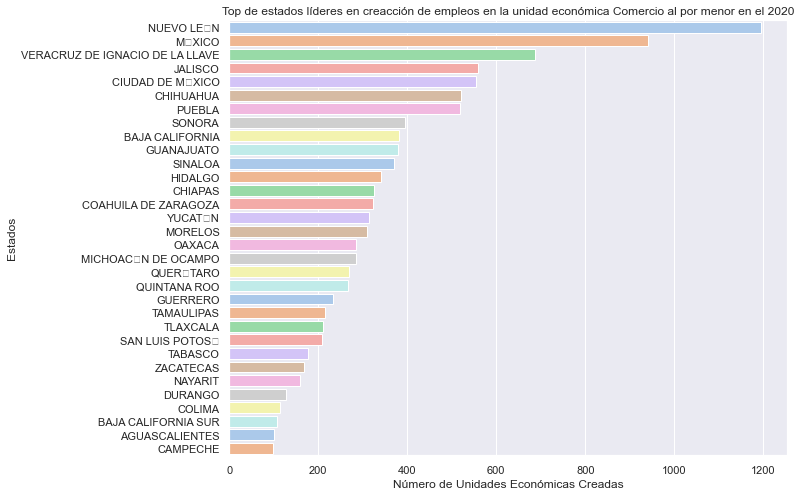

In [448]:
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Top de estados líderes en creacción de empleos en la unidad económica Comercio al por menor en el 2020')

sns.barplot(data=tabulador_df, y='entidad', x='count', palette='pastel')
plt.xlabel('Número de Unidades Económicas Creadas')
plt.ylabel('Estados')
plt.show()

### 3.2. Obtener top de las unidades económicas por CATEGORIA (Código y Descrip) registrados en el 2020
#### 3.2.1. Filter dataset

In [305]:
# Identificamos que codigos de unidades económicas se estan considerando en el dataset

# Seleccionamos columnas a trabajar
# cod_unid_econ_df = e_creadasen2020_df[['codigo_act', 'nombre_act']]
# print(cod_unid_econ_df)

# e_creadasen2020_df.codigo_act, e_creadasen2020_df.nombre_act


cod_unid_econ_df = e_creadasen2020_df.groupby(['nombre_act']).size().reset_index(name="count")
cod_unid_econ_df = cod_unid_econ_df.sort_values(by=['count'], ascending=False)
cod_unid_econ_df = cod_unid_econ_df.reset_index()
cod_unid_econ_df.drop('index', axis=1, inplace=True)
cod_unid_econ_df.shape


# Buscar valores código de actividad 
#t_nat_df = e_creadasen2020_df[e_creadasen2020_df["codigo_act"].isin([464111, 464112, 464113])]


(59, 2)

In [306]:
# Visualizar unidades economicas que fueron creados en el 2020
cod_unid_econ_df.head(60)

,nombre_act,count
0,Comercio al por menor de otros art�culos de us...,2997
1,Comercio al por menor de gasolina y diesel,1363
2,Comercio al por menor en ferreter�as y tlapale...,607
3,Comercio al por menor de tel�fonos y otros apa...,605
4,Comercio al por menor de gas L. P. en cilindro...,527
5,Comercio al por menor de muebles para el hogar,379
6,Comercio al por menor de art�culos para la lim...,353
7,Comercio al por menor de partes y refacciones ...,332
8,Comercio al por menor de pintura,314
9,Comercio al por menor de autom�viles y camione...,308


- Top de las unidades económicas por CATEGORIA (Código y Descrip) registrados en el 2020

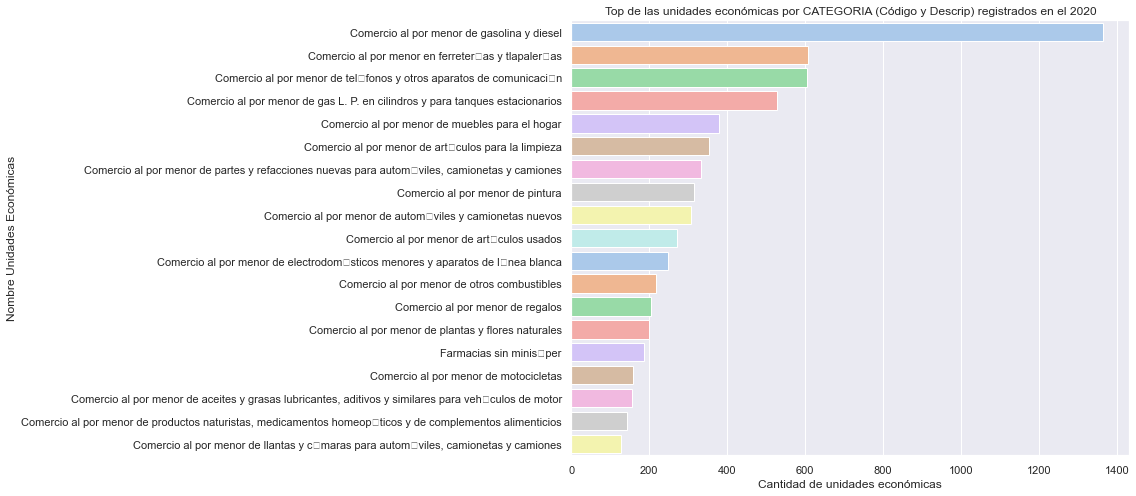

In [452]:
gh_cod_unid_econ_df = cod_unid_econ_df[1:20]
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Top de las unidades económicas por CATEGORIA (Código y Descrip) registrados en el 2020')

sns.barplot(data=gh_cod_unid_econ_df, y='nombre_act', x='count', palette='pastel')
plt.xlabel('Cantidad de unidades económicas')
plt.ylabel('Nombre Unidades Económicas')
plt.show()

### 3.3. Obtener acumulado de unidades económicas creadas por año de registro
#### 3.3.1. Filter dataset y Creation new dataframe

In [314]:
# Agregamos la columna 'anio' a un nuevo dataframe
tab_gral_df = result
tab_gral_df['anio'] = tab_gral_df['fecha_alta'].str.slice(0, 4)
# tab_gral_df.head()

#tab_gral_df = tab_gral_df.groupby(['anio', 'entidad']).size().reset_index(name="count")
tab_gral_df = tab_gral_df.groupby(['anio', 'entidad']).size().reset_index(name="count")
tab_gral_df.head()


,anio,entidad,count
0,2010,AGUASCALIENTES,10133
1,2010,BAJA CALIFORNIA,13526
2,2010,BAJA CALIFORNIA SUR,3774
3,2010,CAMPECHE,5247
4,2010,CHIAPAS,29594


- Reshaping by pivoting DataFrame objects

In [336]:
# Aplicamos pivote al dataframe
tab_pivote = tab_gral_df.pivot(index='entidad', columns='anio', values='count')
#tab_gral_df.pivot(index='entidad', columns='anio', values='count')
tab_pivote

anio,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020
entidad,,,,,,,,,,
AGUASCALIENTES,10133,143,58,310,5522,261,154,68,8599,100
BAJA CALIFORNIA,13526,261,126,212,11432,610,765,172,16541,382
BAJA CALIFORNIA SUR,3774,32,51,197,3280,295,91,74,3816,108
CAMPECHE,5247,31,70,168,3125,151,121,63,4207,98
CHIAPAS,29594,101,63,166,18328,389,299,230,31086,325
CHIHUAHUA,20762,134,125,249,10356,585,527,182,15797,520
CIUDAD DE M�XICO,118997,1294,809,370,46145,3074,1583,922,57348,555
COAHUILA DE ZARAGOZA,14260,239,86,272,9479,446,342,117,13007,323
COLIMA,5020,48,51,44,3032,133,90,49,4908,115


In [338]:
# Integrando el porcentaje de crecimiento 2020 vs 2019

# 106657 / 100
# 940  / x

#x =  (940 * 100)/106657 
#x = round( x * 100, 2)
#print(x)

tab_pivote2 = tab_pivote
# tab_pivote['porcentaje'] = round( ( ( tab_pivote['2020'] * 100 ) / tab_pivote['2019'] ) * 100, 2)
tab_pivote2['porc_crecimiento'] = round( ( tab_pivote2['2020'] * 100 ) / tab_pivote['2019'] , 2)
tab_pivote2



anio,2010,2011,2012,2013,2014,2016,2017,2018,2019,2020,porc_crecimiento
entidad,,,,,,,,,,,
AGUASCALIENTES,10133,143,58,310,5522,261,154,68,8599,100,1.16
BAJA CALIFORNIA,13526,261,126,212,11432,610,765,172,16541,382,2.31
BAJA CALIFORNIA SUR,3774,32,51,197,3280,295,91,74,3816,108,2.83
CAMPECHE,5247,31,70,168,3125,151,121,63,4207,98,2.33
CHIAPAS,29594,101,63,166,18328,389,299,230,31086,325,1.05
CHIHUAHUA,20762,134,125,249,10356,585,527,182,15797,520,3.29
CIUDAD DE M�XICO,118997,1294,809,370,46145,3074,1583,922,57348,555,0.97
COAHUILA DE ZARAGOZA,14260,239,86,272,9479,446,342,117,13007,323,2.48
COLIMA,5020,48,51,44,3032,133,90,49,4908,115,2.34


### 3.4. Ranking de unidades creadas por año y entidad

In [349]:
# Ranking de unidades creadas por año y entidad
ord_tab_gral_df = tab_gral_df

ord_tab_gral_df = ord_tab_gral_df.sort_values(by=['count'], ascending=False)
ord_tab_gral_df = ord_tab_gral_df.reset_index()
ord_tab_gral_df.drop('index', axis=1, inplace=True)
ord_tab_gral_df.head(20)

,anio,entidad,count
0,2010,M�XICO,125424
1,2010,CIUDAD DE M�XICO,118997
2,2019,M�XICO,106657
3,2014,M�XICO,81173
4,2010,JALISCO,73380
5,2019,CIUDAD DE M�XICO,57348
6,2010,GUANAJUATO,51456
7,2019,JALISCO,51426
8,2010,PUEBLA,49878
9,2010,VERACRUZ DE IGNACIO DE LA LLAVE,47039


- Gráfica de Barras

Text(0, 0.5, 'Estados')

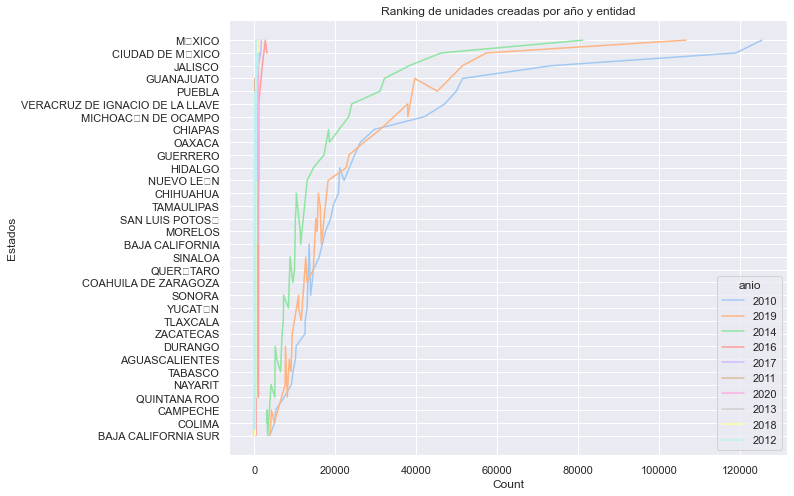

In [460]:
sns.set()

plt.figure(figsize=(10,8))

plt.title('Ranking de unidades creadas por año y entidad')

sns.lineplot(data=ord_tab_gral_df, x="count", y="entidad", hue="anio", palette='pastel')

plt.xlabel('Count')
plt.ylabel('Estados')

- Ranking Año y estados con muy poca creacción de unidades económicas

In [348]:
# Ranking Año y estados con muy poca creacción de unidades económicas
ord_tab_gral_df = ord_tab_gral_df.sort_values(by=['count'], ascending=True)
ord_tab_gral_df = ord_tab_gral_df.reset_index()
ord_tab_gral_df.drop('index', axis=1, inplace=True)
ord_tab_gral_df.head(20)

,anio,entidad,count
0,2018,ZACATECAS,28
1,2012,HIDALGO,31
2,2011,CAMPECHE,31
3,2011,BAJA CALIFORNIA SUR,32
4,2012,TLAXCALA,39
5,2012,MORELOS,41
6,2011,TLAXCALA,42
7,2012,DURANGO,44
8,2013,COLIMA,44
9,2012,ZACATECAS,48


### 3.5. Obtener lista de unidades económicas que continuaron en el 2020

In [437]:
len(result)
# len(result) = 2172950
print(f'No. de registros en Dataframe original: {len(result)}')

No. de registros en Dataframe original: 2172950


In [438]:
# Buscar valores del periodo 2020 
df_2020 = result
df_2020 = df_2020[df_2020['periodo'].isin(['2020_11', '2020_04'])]
df_2020.drop('periodo', axis=1, inplace=True)

# df_2020.periodo.unique()
len(df_2020)

1077113

In [440]:
# Buscar valores de periodos anteriores al 2020
df_anteriores = result
df_anteriores = df_anteriores[~df_anteriores['periodo'].isin(['2020_11', '2020_04'])]
# df_anteriores.periodo.unique()
df_anteriores.drop('periodo', axis=1, inplace=True)

len(df_anteriores)


1095837

In [432]:
# Identificar las unidades económicas que sobrevivieron el 2020

merged_inner = pd.merge(left=df_2020, right=df_anteriores, left_on='id', right_on='id')

merged_inner.shape
merged_inner

,id,nom_estab_x,raz_social_x,codigo_act_x,nombre_act_x,per_ocu_x,tipo_vial_x,nom_vial_x,tipo_asent_x,nomb_asent_x,cod_postal_x,cve_ent_x,entidad_x,cve_mun_x,municipio_x,cve_loc_x,localidad_x,ageb_x,manzana_x,www_x,tipoUniEco_x,latitud_x,longitud_x,fecha_alta_x,anio_x,nom_estab_y,raz_social_y,codigo_act_y,nombre_act_y,per_ocu_y,tipo_vial_y,nom_vial_y,tipo_asent_y,nomb_asent_y,cod_postal_y,cve_ent_y,entidad_y,cve_mun_y,municipio_y,cve_loc_y,localidad_y,ageb_y,manzana_y,www_y,tipoUniEco_y,latitud_y,longitud_y,fecha_alta_y,anio_y
0,7407502,AMERICAN AULET,NaN,466410,Comercio al por menor de art�culos usados,0 a 5 personas,CALLE,OLIVARES SANTANA,LOCALIDAD,CIENEGA GRANDE,20722,1,AGUASCALIENTES,2,Asientos,11,Ci�nega Grande,0156,11.0,NaN,Fijo,22.193516,-102.019091,2019-11,2019,AMERICAN AULET,ISIRIEL VARGAS GALLEGOS,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,OLIVARES SANTANA,LOCALIDAD,CIENEGA GRANDE,20722,1,AGUASCALIENTES,2,Asientos,11,Ci�nega Grande,0156,11.0,NaN,Fijo,22.193516,-102.019091,2019-11,2019
1,7622143,BALBINA BAZAR BOUTIQUE,NaN,466410,Comercio al por menor de art�culos usados,0 a 5 personas,CALLE,REPUBLICA DE ECUADOR,FRACCIONAMIENTO,LAS AMERICAS,20230,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,084A,2.0,NaN,Fijo,21.870078,-102.300519,2019-11,2019,BALBINA BAZAR BOUTIQUE,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,REPUBLICA DE ECUADOR,FRACCIONAMIENTO,LAS AMERICAS,20230,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,084A,2.0,NaN,Fijo,21.870078,-102.300519,2019-11,2019
2,33452,BAZAAR CHILL OUT,NaN,466410,Comercio al por menor de art�culos usados,0 a 5 personas,AVENIDA,QUINTA AVENIDA,FRACCIONAMIENTO,AGRICULTURA,20234,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0869,26.0,NaN,Fijo,21.862649,-102.299238,2014-12,2014,BAZAAR CHILL OUT,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,AVENIDA,QUINTA,FRACCIONAMIENTO,AGRICULTURA,20234,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0869,26.0,NaN,Fijo,21.862649,-102.299238,2014-12,2014
3,33452,BAZAAR CHILL OUT,NaN,466410,Comercio al por menor de art�culos usados,0 a 5 personas,AVENIDA,QUINTA AVENIDA,FRACCIONAMIENTO,AGRICULTURA,20234,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0869,26.0,NaN,Fijo,21.862649,-102.299238,2014-12,2014,TIENDA DE ROPA SIN NOMBRE,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,AVENIDA,QUINTA,FRACCIONAMIENTO,AGRICULTURA,20234,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0869,26.0,NaN,Fijo,21.862649,-102.299238,2014-12,2014
4,8196187,BAZAR ARIES,NaN,466410,Comercio al por menor de art�culos usados,0 a 5 personas,AVENIDA,OJOCALIENTE,FRACCIONAMIENTO,OJOCALIENTE 1,20190,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,2329,14.0,NaN,Fijo,21.880844,-102.253137,2019-11,2019,BAZAR ARIES,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,AVENIDA,OJOCALIENTE,FRACCIONAMIENTO,OJOCALIENTE 1,20190,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,2329,14.0,NaN,Fijo,21.880844,-102.253137,2019-11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874340,6723809,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,AVENIDA,JU�REZ,COLONIA,CENTRO,99000,32,ZACATECAS,10,Fresnillo,1,Fresnillo,0558,8.0,NaN,Fijo,23.174401,-102.870485,2016-01,2016,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,AVENIDA,JU�REZ,COLONIA,CENTRO,99000,32,ZACATECAS,10,Fresnillo,1,Fresnillo,0558,8.0,NaN,Fijo,23.174401,-102.870485,2016-01,2016
874341,4615024,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CALLE,INDEPENDENCIA,COLONIA,CENTRO,98600,32,ZACATECAS,

In [433]:
# Identificar las unidades económicas que sobrevivieron el 2020

merged_left = pd.merge(left=df_2020, right=df_anteriores, how='left', left_on='id', right_on='id')
merged_left

,id,nom_estab_x,raz_social_x,codigo_act_x,nombre_act_x,per_ocu_x,tipo_vial_x,nom_vial_x,tipo_asent_x,nomb_asent_x,cod_postal_x,cve_ent_x,entidad_x,cve_mun_x,municipio_x,cve_loc_x,localidad_x,ageb_x,manzana_x,www_x,tipoUniEco_x,latitud_x,longitud_x,fecha_alta_x,anio_x,nom_estab_y,raz_social_y,codigo_act_y,nombre_act_y,per_ocu_y,tipo_vial_y,nom_vial_y,tipo_asent_y,nomb_asent_y,cod_postal_y,cve_ent_y,entidad_y,cve_mun_y,municipio_y,cve_loc_y,localidad_y,ageb_y,manzana_y,www_y,tipoUniEco_y,latitud_y,longitud_y,fecha_alta_y,anio_y
0,6281167,1342 ELEKTRA DEL MILENIO AGUASCALIENTES 2 ASUN...,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,CC. VILLASUNCION,HACIENDA,INFONAVIT PILAR BLANCO,20289,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,27.0,WWW.ELEKTRA.COM.MX,Fijo,21.850052,-102.293881,2010-07,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6281352,1504 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,PRIVADA,ALLENDE,COLONIA,AGUASCALIENTES CENTRO,20000,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0638,13.0,WWW.ELEKTRA.COM.MX,Fijo,21.882179,-102.296906,2010-07,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8853,2007 ALUMINIO,NaN,467114,Comercio al por menor de vidrios y espejos,0 a 5 personas,AVENIDA,MAHATMA GANDHI,FRACCIONAMIENTO,PARQUE URBANO HEROES MEXICANOS,20280,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1458,46.0,NaN,Fijo,21.857334,-102.294679,2010-07,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6281967,2212 AGUASCALIENTES RINCON DE ROMOS,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,6 a 10 personas,AVENIDA,MORELOS,COLONIA,RINCON DE ROMOS CENTRO,20400,1,AGUASCALIENTES,7,Rinc�n de Romos,1,Rinc�n de Romos,0059,31.0,WWW.ELEKTRA.COM.MX,Fijo,22.232272,-102.320699,2010-07,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6281175,3010 ELEKTRA DEL MILENIO,NUEVA ELEKTRA DEL MILENIO SA DE CV,466112,Comercio al por menor de electrodom�sticos men...,0 a 5 personas,AVENIDA,Convenci�n de 1914 Poniente,HACIENDA,OLIVARES SANTANA,20010,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0322,31.0,WWW.ELEKTRA.COM.MX,Fijo,21.894886,-102.311428,2010-07,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382254,6723809,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,AVENIDA,JU�REZ,COLONIA,CENTRO,99000,32,ZACATECAS,10,Fresnillo,1,Fresnillo,0558,8.0,NaN,Fijo,23.174401,-102.870485,2016-01,2016,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211.0,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,AVENIDA,JU�REZ,COLONIA,CENTRO,99000.0,32.0,ZACATECAS,10.0,Fresnillo,1.0,Fresnillo,0558,8.0,NaN,Fijo,23.174401,-102.870485,2016-01,2016
1382255,4615024,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CALLE,INDEPENDENCIA,COLONIA,CENTRO,98600,32,ZACATECAS,56,Zacatecas,1,Zacatecas,0114,20.0,NaN,Fijo,22.771058,-102.573292,2013-07,2013,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211.0,"Comercio al por menor de ropa, excepto de beb�...",6 a 10 personas,CALLE,INDEPENDENCIA,COLONIA,CENTRO,98600.0,32.0,ZACATECAS,56.0,Zacatecas,1.0,Zacatecas,0114,20.0,NaN,Fijo,22.771058,-102.573292,2013-07,2013
1382256,4615024,ZOY ZOLO YO,DISE�O Y MODA PARAZOY SA DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CAL

### 3.6. Obtener lista de unidades económicas que NO continuaron en el 2020

In [441]:
# Identificar las unidades económicas que no sobrevivieron el 2020

merged_right = pd.merge(left=df_2020, right=df_anteriores, how='right',  left_on='id', right_on='id')

merged_right.shape
merged_right

,id,nom_estab_x,raz_social_x,codigo_act_x,nombre_act_x,per_ocu_x,tipo_vial_x,nom_vial_x,tipo_asent_x,nomb_asent_x,cod_postal_x,cve_ent_x,entidad_x,cve_mun_x,municipio_x,cve_loc_x,localidad_x,ageb_x,manzana_x,www_x,tipoUniEco_x,latitud_x,longitud_x,fecha_alta_x,anio_x,nom_estab_y,raz_social_y,codigo_act_y,nombre_act_y,per_ocu_y,tipo_vial_y,nom_vial_y,tipo_asent_y,nomb_asent_y,cod_postal_y,cve_ent_y,entidad_y,cve_mun_y,municipio_y,cve_loc_y,localidad_y,ageb_y,manzana_y,www_y,tipoUniEco_y,latitud_y,longitud_y,fecha_alta_y,anio_y
0,8541319,+ VISION,GMVM SA DE CV,464121.0,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,CONVENCION DE 1914 ORIENTE,FRACCIONAMIENTO,LOMAS DE SANTANITA,20180.0,1.0,AGUASCALIENTES,1.0,Aguascalientes,1.0,Aguascalientes,1354,15.0,NaN,Fijo,21.890777,-102.274040,2019-11,2019,+ VISION,GMVM SA DE CV,464121,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,CONVENCION DE 1914 ORIENTE,FRACCIONAMIENTO,LOMAS DE SANTANITA,20180,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1354,15.0,NaN,Fijo,21.890777,-102.274040,2019-11,2019
1,8514602,+ VISION OPTICA,GVMV SA DE CV,464121.0,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,AGUASCALIENTES SUR,FRACCIONAMIENTO,VILLA JARDIN,20235.0,1.0,AGUASCALIENTES,1.0,Aguascalientes,1.0,Aguascalientes,0869,42.0,NaN,Fijo,21.859418,-102.298205,2019-11,2019,+ VISION OPTICA,GVMV SA DE CV,464121,Comercio al por menor de lentes,0 a 5 personas,AVENIDA,AGUASCALIENTES SUR,FRACCIONAMIENTO,VILLA JARDIN,20235,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,0869,42.0,NaN,Fijo,21.859418,-102.298205,2019-11,2019
2,6282059,"044AGUASCALIENTES,CC ALTARIA",SERVICIOS SHASA S DE RL DE CV,463211.0,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CALLE,NINGUNO,COLONIA,TROJES DE ALONSO,20116.0,1.0,AGUASCALIENTES,1.0,Aguascalientes,1.0,Aguascalientes,1320,66.0,WWW.SHASA.COM,Fijo,21.925098,-102.290276,2010-07,2010,"044AGUASCALIENTES,CC ALTARIA",SERVICIOS SHASA S DE RL DE CV,463211,"Comercio al por menor de ropa, excepto de beb�...",251 y m�s personas,CALLE,NINGUNO,COLONIA,TROJES DE ALONSO,20116,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1320,66.0,WWW.SHASA.COM,Fijo,21.925098,-102.290276,2010-07,2010
3,7043395,101 COPIAS Y PAPELERIA,NaN,465311.0,Comercio al por menor de art�culos de papeler�a,0 a 5 personas,CALLE,MELCHOR OCAMPO,BARRIO,EL SALTO,20330.0,1.0,AGUASCALIENTES,10.0,El Llano,1.0,Palo Alto,0143,1.0,NaN,Fijo,21.920380,-101.963972,2019-11,2019,101 COPIAS Y PAPELERIA,NaN,465311,Comercio al por menor de art�culos de papeler�a,0 a 5 personas,CALLE,MELCHOR OCAMPO,BARRIO,EL SALTO,20330,1,AGUASCALIENTES,10,El Llano,1,Palo Alto,0143,1.0,NaN,Fijo,21.920380,-101.963972,2019-11,2019
4,6282051,133 AGUASCALIENTES JUGUETRON,DISTRIBUIDORA JUGUETRON SA DE CV,465212.0,Comercio al por menor de juguetes,6 a 10 personas,BOULEVARD,ZACATECAS NORTE,COLONIA,FRACC TROJES DE ALONSO,20116.0,1.0,AGUASCALIENTES,1.0,Aguascalientes,1.0,Aguascalientes,1320,43.0,NaN,Fijo,21.926742,-102.290913,2010-07,2010,133 AGUASCALIENTES JUGUETRON,DISTRIBUIDORA JUGUETRON SA DE CV,465212,Comercio al por menor de juguetes,6 a 10 personas,BOULEVARD,ZACATECAS NORTE,COLONIA,FRACC TROJES DE ALONSO,20116,1,AGUASCALIENTES,1,Aguascalientes,1,Aguascalientes,1320,43.0,NaN,Fijo,21.926742,-102.290913,2010-07,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095878,4628139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZONA VIP MODA,NaN,463211,"Comercio al por menor de ropa, excepto de beb�...",0 a 5 personas,CALLE,HER�ICO COLEGIO MILITAR,SECCI�N,SECCI�N 2,99400,32,ZACATECAS,31,Monte Escobedo,1,Monte Escobedo,0242,26.0,NaN,Fijo,22.302581,-103.560015,2014-12,2014
1095879,4596737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ZOY ZOLO YO,DISE�O Y MODA PARISINA,463

### 3.7. Ranking de número de  empleados ocupan

In [482]:
# Count values by column 'per_ocupa'
per_ocu_count = result.per_ocu.value_counts()

# Getting first 20 items from previous serie/list
per_ocu_count = per_ocu_count[:20]

# Resetting index
per_ocu_count = per_ocu_count.reset_index()

# Set name for columns
per_ocu_count = per_ocu_count.rename(columns={'index':'per_ocu', 'per_ocu':'count'})

# showing result
print(per_ocu_count)


              per_ocu    count
0      0 a 5 personas  2032480
1     6 a 10 personas    80578
2    11 a 30 personas    46992
3    31 a 50 personas     5230
4  251 y m�s personas     3345
5   51 a 100 personas     2842
6  101 a 250 personas     1483


- Grafica de Barras

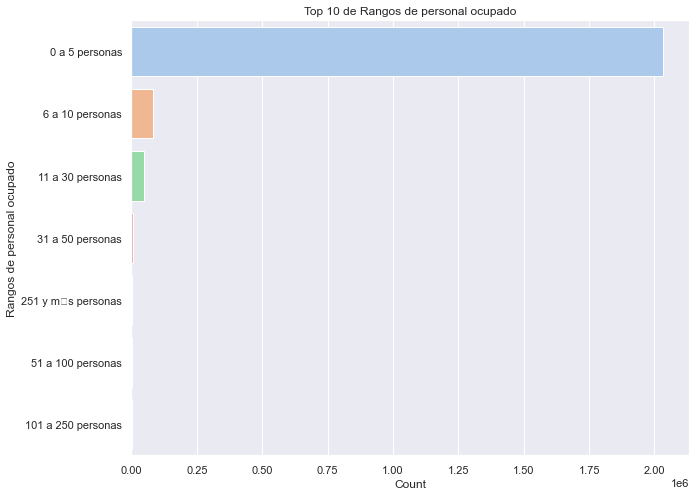

In [481]:
sns.set()
plt.figure(figsize=(10, 8))
plt.title('Top 10 de Rangos de personal ocupado')
sns.barplot(data=per_ocu_count, y='per_ocu', x='count', palette='pastel')
plt.xlabel('Count')
plt.ylabel('Rangos de personal ocupado')
plt.show()

# FIN

-------------------------------------------------------------